# Plot model fit comparisons for simulation analysis 2

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mindstorm import statplot
from psifr import fr
from cfr import framework
from cfr import figures

res_dir = Path(os.environ['CFR_RESULTS'])
fit_dir = Path(os.environ['CFR_FITS'])
fig_dir = Path(os.environ['CFR_FIGURES']) / 'sim2'

data_file = res_dir / 'cfr_eeg_mixed.csv'
patterns_file = res_dir / 'cfr_patterns.hdf5'
os.makedirs(fig_dir, exist_ok=True)
figures.set_style()

## Load model fits

In [2]:
models = [
    'cmrs_fcf-loc-cat-use',
    'cmrs_fcf-loc-cat-use_sl-B_enc-B_rec',
    'cmrs_fcf-loc-cat-use_sl-B_enc-B_rec_fix-B_rec_cat1-B_rec_use1',
    'cmrs_fcf-loc_ff-cat-use',
]
model_names = [
    'CMR-D',
    'CMR-D variable',
    'CMR-D restricted',
    'CMR MP16',
]
res = framework.read_model_fits(fit_dir, models, model_names)
res

rep    T       Lfc       Lcf        P1        P2     B_enc  \
model    subject                                                               
CMR-D    1          1  0.1  0.129424  0.058593  0.019413  0.697093  0.730592   
         2          0  0.1  0.124923  0.145589  0.047002  0.402589  0.737667   
         3          4  0.1  0.077447  0.060130  0.014340  2.395219  0.635304   
         5          1  0.1  0.092995  0.075921  0.042064  0.679784  0.498717   
         8          1  0.1  0.067535  0.031201  0.012248  0.803299  0.610174   
...               ...  ...       ...       ...       ...       ...       ...   
CMR MP16 42         2  0.1  0.042879  0.025951  0.070871  0.393477  0.623992   
         43         2  0.1  0.058725  0.000000  0.102172  0.304195  0.688591   
         44         1  0.1  0.028045  0.000000  0.218584  1.314185  0.647949   
         45         4  0.1  0.018154  0.000000  0.000000  0.812489  0.616826   
         46         3  0.1  0.114962  0.077307  0.167971  0.483059  0.550627   

                   B_start     B_rec        X1  ...  B_enc_use  B_rec_loc  \
model    subject                                ...                         
CMR-D    1        0.869588  0.907383  0.007905  ...        NaN        NaN   
         2        0.924383  0.879199  0.001005  ...        NaN        NaN   
         3        0.001734  0.882577  0.004910  ...        NaN        NaN   
         5        0.000000  0.826398  0.001096  ...        NaN        NaN   
         8        0.546840  0.804364  0.009349  ...        NaN        NaN   
...                    ...       ...       ...  ...        ...        ...   
CMR MP16 42       0.063617  0.727795  0.015213  ...        NaN        NaN   
         43       0.932211  0.765269  0.000834  ...        NaN        NaN   
         44       0.755463  0.695143  0.005347  ...        NaN        NaN   
         45       0.779508  0.636973  0.012111  ...        NaN        NaN   
         46       0.748386  0.632443  0.000732  ...        NaN        NaN   

                  B_rec_cat  B_rec_use        s0       Dff    sr_cat  \
model    subject                                                       
CMR-D    1              NaN        NaN       NaN       NaN       NaN   
         2              NaN        NaN       NaN       NaN       NaN   
         3              NaN        NaN       NaN       NaN       NaN   
         5              NaN        NaN       NaN       NaN       NaN   
         8              NaN        NaN       NaN       NaN       NaN   
...                     ...        ...       ...       ...       ...   
CMR MP16 42             NaN        NaN  0.091742  0.156652  0.091742   
         43             NaN        NaN  0.356625  0.164761  0.356625   
         44             NaN        NaN  0.971835  0.046372  0.971835   
         45             NaN        NaN  0.606381  0.089093  0.606381   
         46             NaN        NaN  0.538621  0.095551  0.538621   

                    sr_use     s_cat     s_use  
model    subject                                
CMR-D    1             NaN       NaN       NaN  
         2             NaN       NaN       NaN  
         3             NaN       NaN       NaN  
         5             NaN       NaN       NaN  
         8             NaN       NaN       NaN  
...                    ...       ...       ...  
CMR MP16 42       0.908258  0.091742  0.908258  
         43       0.643375  0.356625  0.643375  
         44       0.028165  0.971835  0.028165  
         45       0.393619  0.606381  0.393619  
         46       0.461379  0.538621  0.461379  

[116 rows x 42 columns]

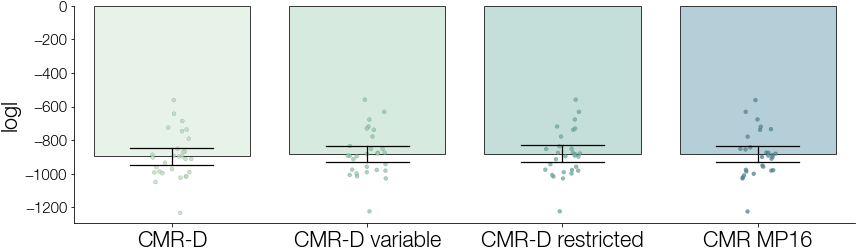

In [3]:
res_full = framework.model_comp_weights(res, stat='aic')
fig, ax = plt.subplots(figsize=(14, 4))
g = figures.plot_swarm_bar(
    data=res_full.reset_index(), x='model', y='logl', point_kind='strip', ax=ax
)

LINO NOT subset; don't know how to subset; dropped


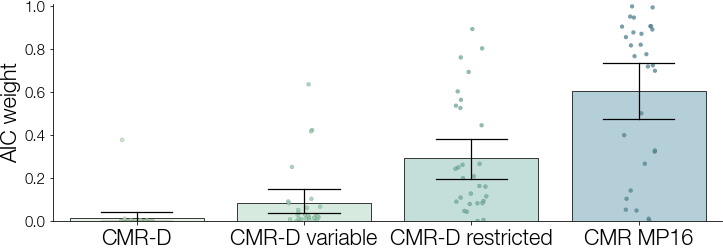

In [4]:
res_full = framework.model_comp_weights(res, stat='aic')
fig, ax = plt.subplots(figsize=(12, 4))
g = figures.plot_swarm_bar(
    data=res_full.reset_index(), x='model', y='waic', point_kind='strip', ax=ax
)
ax.set(ylabel='AIC weight', ylim=(0, 1.01));
fig.savefig(fig_dir / 'waic_full.pdf')

In [5]:
dark = sns.color_palette(
    'ch:start=1, rot=1.5, light=.7, dark=.3, gamma=1, hue=.5'
)
dark

[(0.7689335648950519, 0.6824396172757954, 0.6240123846554909),
 (0.7250187127782463, 0.5677430873950093, 0.6103083104698684),
 (0.623013021104788, 0.4855809829815538, 0.6161810850461853),
 (0.464634733019296, 0.4332443294049108, 0.5801730795425324),
 (0.31355069957273196, 0.3965359745123169, 0.4760973803152319),
 (0.2050147315167219, 0.34168808481661433, 0.31762490490999895)]

In [6]:
light = sns.color_palette(
    'ch:start=1, rot=1.5, light=.7, dark=.3, gamma=.5, hue=1'
)
light

[(0.9248203983802259, 0.8124754066629261, 0.7365856230946308),
 (0.9370151046580671, 0.7134152392755648, 0.773930517001042),
 (0.8638347057562072, 0.6485629096614572, 0.8531332480304541),
 (0.6875944308206159, 0.6323388125763083, 0.8909732355818533),
 (0.4826946089121227, 0.6491392670198295, 0.8087166257388984),
 (0.325484389760949, 0.649366831333291, 0.5923429764853889)]

LINO NOT subset; don't know how to subset; dropped


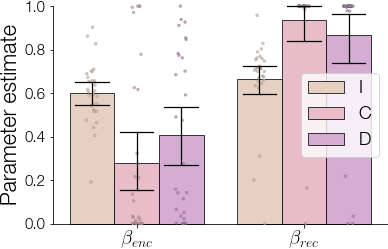

In [7]:
B_names = [
    'B_enc_loc',
    'B_enc_cat',
    'B_enc_use',
    'B_rec_loc',
    'B_rec_cat',
    'B_rec_use',
]
B_labels = [
    r'$\beta_\mathrm{enc}^{I}$',
    r'$\beta_\mathrm{enc}^{C}$',
    r'$\beta_\mathrm{enc}^{D}$',
    r'$\beta_\mathrm{rec}^{I}$',
    r'$\beta_\mathrm{rec}^{C}$',
    r'$\beta_\mathrm{rec}^{D}$',
]
B_subset = pd.melt(
    res.loc['CMR-D variable', B_names].reset_index(),
    id_vars='subject', 
    value_vars=B_names,
    var_name='parameter',
    value_name='value',
)
B_subset['phase'] = B_subset['parameter'].map(
    {
        'B_enc_loc': 'enc',
        'B_enc_cat': 'enc',
        'B_enc_use': 'enc',
        'B_rec_loc': 'rec',
        'B_rec_cat': 'rec',
        'B_rec_use': 'rec',
    }
)
B_subset['sublayer'] = B_subset['parameter'].map(
    {
        'B_enc_loc': 'I',
        'B_enc_cat': 'C',
        'B_enc_use': 'D',
        'B_rec_loc': 'I',
        'B_rec_cat': 'C',
        'B_rec_use': 'D',
    }
)
fig, ax = plt.subplots(figsize=(6, 4))
statplot.plot_swarm_bar(
    B_subset,
    x='phase',
    y='value',
    hue='sublayer',
    point_kind='strip',
    light=light,
    dark=dark,
    dodge=True,
    bar_kws={'capsize': 0.2, 'clip_on': False},
    ax=ax,
)
ax.set(ylim=(0, 1), ylabel='Parameter estimate')
ax.set_xticks(
    [0, 1], 
    [r'$\beta_{enc}$', r'$\beta_{rec}$'], 
    usetex=True, 
    fontfamily='helvetica',
    fontsize=20,
)
fig.savefig(fig_dir / 'param_B.pdf')

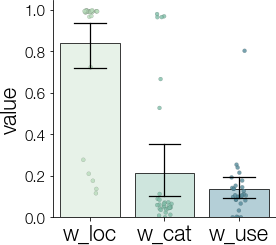

In [8]:
w_names = ['w_loc', 'w_cat', 'w_use']
w_param = pd.melt(
    res.loc['CMR-D variable', w_names].reset_index(), id_vars='subject', 
    value_vars=w_names, var_name='parameter', value_name='value',
)
fig, ax = plt.subplots(figsize=(4, 4))
figures.plot_swarm_bar(w_param, x='parameter', y='value', point_kind='strip', ax=ax)

In [9]:
res = framework.read_model_fits(fit_dir, models, model_names)
subs = res.loc['CMR-D']
param_map = {
    'B_enc': ['B_enc_loc', 'B_enc_cat', 'B_enc_use'],
    'B_rec': ['B_rec_loc', 'B_rec_cat', 'B_rec_use'],
}
#for key, val in param_map.items():
# res.loc['CMR-D', 'B_enc_cat'] = subs['CMR-D', 'B_enc']
for key, params in param_map.items():
    inc = res[key].notna()
    for param in params:
        res.loc[inc, param] = res.loc[inc, key]
res

rep    T       Lfc       Lcf        P1        P2     B_enc  \
model    subject                                                               
CMR-D    1          1  0.1  0.129424  0.058593  0.019413  0.697093  0.730592   
         2          0  0.1  0.124923  0.145589  0.047002  0.402589  0.737667   
         3          4  0.1  0.077447  0.060130  0.014340  2.395219  0.635304   
         5          1  0.1  0.092995  0.075921  0.042064  0.679784  0.498717   
         8          1  0.1  0.067535  0.031201  0.012248  0.803299  0.610174   
...               ...  ...       ...       ...       ...       ...       ...   
CMR MP16 42         2  0.1  0.042879  0.025951  0.070871  0.393477  0.623992   
         43         2  0.1  0.058725  0.000000  0.102172  0.304195  0.688591   
         44         1  0.1  0.028045  0.000000  0.218584  1.314185  0.647949   
         45         4  0.1  0.018154  0.000000  0.000000  0.812489  0.616826   
         46         3  0.1  0.114962  0.077307  0.167971  0.483059  0.550627   

                   B_start     B_rec        X1  ...  B_enc_use  B_rec_loc  \
model    subject                                ...                         
CMR-D    1        0.869588  0.907383  0.007905  ...   0.730592   0.907383   
         2        0.924383  0.879199  0.001005  ...   0.737667   0.879199   
         3        0.001734  0.882577  0.004910  ...   0.635304   0.882577   
         5        0.000000  0.826398  0.001096  ...   0.498717   0.826398   
         8        0.546840  0.804364  0.009349  ...   0.610174   0.804364   
...                    ...       ...       ...  ...        ...        ...   
CMR MP16 42       0.063617  0.727795  0.015213  ...   0.623992   0.727795   
         43       0.932211  0.765269  0.000834  ...   0.688591   0.765269   
         44       0.755463  0.695143  0.005347  ...   0.647949   0.695143   
         45       0.779508  0.636973  0.012111  ...   0.616826   0.636973   
         46       0.748386  0.632443  0.000732  ...   0.550627   0.632443   

                  B_rec_cat  B_rec_use        s0       Dff    sr_cat  \
model    subject                                                       
CMR-D    1         0.907383   0.907383       NaN       NaN       NaN   
         2         0.879199   0.879199       NaN       NaN       NaN   
         3         0.882577   0.882577       NaN       NaN       NaN   
         5         0.826398   0.826398       NaN       NaN       NaN   
         8         0.804364   0.804364       NaN       NaN       NaN   
...                     ...        ...       ...       ...       ...   
CMR MP16 42        0.727795   0.727795  0.091742  0.156652  0.091742   
         43        0.765269   0.765269  0.356625  0.164761  0.356625   
         44        0.695143   0.695143  0.971835  0.046372  0.971835   
         45        0.636973   0.636973  0.606381  0.089093  0.606381   
         46        0.632443   0.632443  0.538621  0.095551  0.538621   

                    sr_use     s_cat     s_use  
model    subject                                
CMR-D    1             NaN       NaN       NaN  
         2             NaN       NaN       NaN  
         3             NaN       NaN       NaN  
         5             NaN       NaN       NaN  
         8             NaN       NaN       NaN  
...                    ...       ...       ...  
CMR MP16 42       0.908258  0.091742  0.908258  
         43       0.643375  0.356625  0.643375  
         44       0.028165  0.971835  0.028165  
         45       0.393619  0.606381  0.393619  
         46       0.461379  0.538621  0.461379  

[116 rows x 42 columns]

In [10]:
import importlib
importlib.reload(framework)
param_map = {
    'B_enc': ['B_enc_loc', 'B_enc_cat', 'B_enc_use'],
    'B_rec': ['B_rec_loc', 'B_rec_cat', 'B_rec_use'],
}
res = framework.read_model_fits(fit_dir, models, model_names, param_map)
res

rep    T       Lfc       Lcf        P1        P2   B_start  \
model    subject                                                               
CMR-D    1          1  0.1  0.129424  0.058593  0.019413  0.697093  0.869588   
         2          0  0.1  0.124923  0.145589  0.047002  0.402589  0.924383   
         3          4  0.1  0.077447  0.060130  0.014340  2.395219  0.001734   
         5          1  0.1  0.092995  0.075921  0.042064  0.679784  0.000000   
         8          1  0.1  0.067535  0.031201  0.012248  0.803299  0.546840   
...               ...  ...       ...       ...       ...       ...       ...   
CMR MP16 42         2  0.1  0.042879  0.025951  0.070871  0.393477  0.063617   
         43         2  0.1  0.058725  0.000000  0.102172  0.304195  0.932211   
         44         1  0.1  0.028045  0.000000  0.218584  1.314185  0.755463   
         45         4  0.1  0.018154  0.000000  0.000000  0.812489  0.779508   
         46         3  0.1  0.114962  0.077307  0.167971  0.483059  0.748386   

                        X1        X2        w0  ...  B_enc_use  B_rec_loc  \
model    subject                                ...                         
CMR-D    1        0.007905  0.261810  0.959940  ...   0.730592   0.907383   
         2        0.001005  0.406040  0.989409  ...   0.737667   0.879199   
         3        0.004910  0.307622  0.956491  ...   0.635304   0.882577   
         5        0.001096  0.315610  0.894097  ...   0.498717   0.826398   
         8        0.009349  0.311500  0.950488  ...   0.610174   0.804364   
...                    ...       ...       ...  ...        ...        ...   
CMR MP16 42       0.015213  0.262005       NaN  ...   0.623992   0.727795   
         43       0.000834  0.422880       NaN  ...   0.688591   0.765269   
         44       0.005347  0.335589       NaN  ...   0.647949   0.695143   
         45       0.012111  0.220680       NaN  ...   0.616826   0.636973   
         46       0.000732  0.432813       NaN  ...   0.550627   0.632443   

                  B_rec_cat  B_rec_use        s0       Dff    sr_cat  \
model    subject                                                       
CMR-D    1         0.907383   0.907383       NaN       NaN       NaN   
         2         0.879199   0.879199       NaN       NaN       NaN   
         3         0.882577   0.882577       NaN       NaN       NaN   
         5         0.826398   0.826398       NaN       NaN       NaN   
         8         0.804364   0.804364       NaN       NaN       NaN   
...                     ...        ...       ...       ...       ...   
CMR MP16 42        0.727795   0.727795  0.091742  0.156652  0.091742   
         43        0.765269   0.765269  0.356625  0.164761  0.356625   
         44        0.695143   0.695143  0.971835  0.046372  0.971835   
         45        0.636973   0.636973  0.606381  0.089093  0.606381   
         46        0.632443   0.632443  0.538621  0.095551  0.538621   

                    sr_use     s_cat     s_use  
model    subject                                
CMR-D    1             NaN       NaN       NaN  
         2             NaN       NaN       NaN  
         3             NaN       NaN       NaN  
         5             NaN       NaN       NaN  
         8             NaN       NaN       NaN  
...                    ...       ...       ...  
CMR MP16 42       0.908258  0.091742  0.908258  
         43       0.643375  0.356625  0.643375  
         44       0.028165  0.971835  0.028165  
         45       0.393619  0.606381  0.393619  
         46       0.461379  0.538621  0.461379  

[116 rows x 40 columns]

In [19]:
import importlib
importlib.reload(figures)
table = figures.create_model_table(fit_dir, models, model_names, param_map)
names = [
    r'\beta_{\mathrm{enc},C}',
    r'\beta_{\mathrm{enc},D}',
    r'\beta_{\mathrm{rec},C}',
    r'\beta_{\mathrm{rec},D}',
]
for name in names:
    table.loc[name, 'CMR MP16'] = '---'
# table.to_latex(fig_dir / 'parameters1.tex', escape=False)
table

,CMR-D,CMR-D variable,CMR-D restricted,CMR MP16
L_{FC},0.10 (0.01),0.22 (0.06),0.18 (0.05),0.08 (0.01)
L_{CF},0.09 (0.01),0.22 (0.06),0.16 (0.05),0.07 (0.01)
\phi_s,0.03 (0.01),0.06 (0.01),0.08 (0.01),0.54 (0.14)
\phi_d,1.49 (0.25),1.12 (0.26),1.30 (0.27),1.26 (0.20)
\beta_{\mathrm{start}},0.54 (0.07),0.42 (0.06),0.41 (0.07),0.49 (0.07)
\theta_s,0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00)
\theta_r,0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01)
w_1,0.96 (0.00),0.80 (0.06),0.85 (0.05),---
w_2,0.09 (0.01),0.13 (0.03),0.10 (0.01),---
"\beta_{\mathrm{enc},I}",0.62 (0.02),0.60 (0.03),0.60 (0.03),0.60 (0.02)
